In [125]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [126]:
sales_df = pd.read_csv('advertising_and_sales_clean.csv')

In [127]:
sales_df

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18
...,...,...,...,...,...
4541,26000.0,4472.36,717.09,Micro,94685.87
4542,71000.0,20610.69,6545.57,Nano,249101.92
4543,44000.0,19800.07,5096.19,Micro,163631.46
4544,71000.0,17534.64,1940.87,Macro,253610.41


In [128]:
sales_df.influencer = sales_df.influencer.astype('category')
sales_df.influencer = sales_df.influencer.cat.codes

In [129]:
# from sklearn.preprocessing import LabelEncoder

# enc = LabelEncoder()
# sales_df.influencer = enc.fit_transform(sales_df.influencer)

In [130]:
sales_df

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,1,54732.76
1,13000.0,9237.76,2409.57,1,46677.90
2,41000.0,15886.45,2913.41,1,150177.83
3,83000.0,30020.03,6922.30,1,298246.34
4,15000.0,8437.41,1406.00,2,56594.18
...,...,...,...,...,...
4541,26000.0,4472.36,717.09,2,94685.87
4542,71000.0,20610.69,6545.57,3,249101.92
4543,44000.0,19800.07,5096.19,2,163631.46
4544,71000.0,17534.64,1940.87,0,253610.41


#### Using One Feature to Predict the Label

In [131]:

X_radio = sales_df.radio.values
y = sales_df.sales.values

In [132]:
X_radio =X_radio.reshape(-1,1)

In [133]:
from sklearn.linear_model import LinearRegression

reg =LinearRegression()

reg.fit(X_radio,y)

predictions = reg.predict(X_radio)

<function matplotlib.pyplot.show(close=None, block=None)>

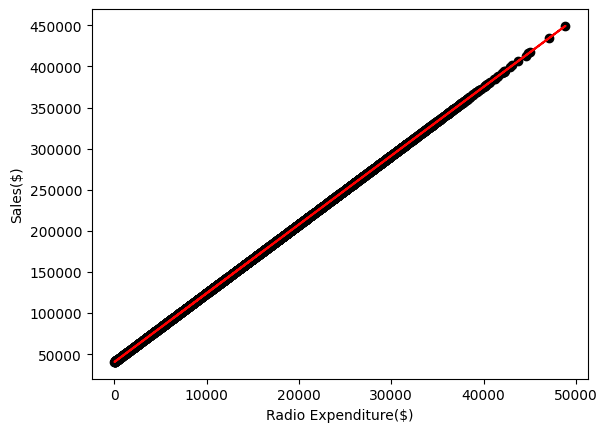

In [134]:
plt.scatter(X_radio, predictions,  color='black')

plt.plot(X_radio, predictions, color='red')
plt.xlabel('Radio Expenditure($)')
plt.ylabel('Sales($)')

plt.show

#### Splitting the dataset and fitting it into the model for training using all features

In [135]:
X= sales_df.drop('sales', axis=1).values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=22)

In [136]:
X_train

array([[7.400000e+04, 3.120063e+04, 5.956150e+03, 0.000000e+00],
       [2.900000e+04, 1.121369e+04, 5.588400e+02, 0.000000e+00],
       [9.700000e+04, 3.891396e+04, 9.088160e+03, 3.000000e+00],
       ...,
       [4.600000e+04, 1.235741e+04, 8.369400e+02, 2.000000e+00],
       [2.300000e+04, 3.511060e+03, 1.668670e+03, 3.000000e+00],
       [7.000000e+04, 1.625833e+04, 1.726270e+03, 2.000000e+00]])

In [137]:
reg.fit(X_train, y_train)

LinearRegression()

#### Predicting values and Evaluating the model using metrics

In [138]:
y_pred = reg.predict(X_test)

print(f'Predictions :  {y_pred[:2]}, Actual Values : {y_test[:2]}')

Predictions :  [78228.5264634 99548.258976 ], Actual Values : [80509.89 99431.62]


In [140]:
from sklearn.metrics import mean_squared_error


r_squared = reg.score(X_test, y_test)


rmse = mean_squared_error(y_test, y_pred, squared=False)


print('R^2: {}'.format(r_squared))
print('Root Mean Squared Error: {}'.format(rmse))

R^2: 0.9990161308710425
Root Mean Squared Error: 2907.325473384666


#### CROSS VALIDATION.

###### This ensures that the model is trained and tested on all of the data available.

In [142]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits = 6, shuffle= True, random_state = 5)

In [143]:
#Cross-val-score returns an array giving the R2 score for each fold in KFold, the length of the array is the number of splits.
cv_scores = cross_val_score(reg, X, y, cv=kf)

In [150]:
print(cv_scores)

#Analysing the standard deviation and 95th  confidence interval fro the results
print(np.std(cv_scores), np.quantile(cv_scores, [0.025, 0.975]), sep='\n')

[0.99894065 0.99909133 0.99901063 0.99896334 0.99889194 0.99903906]
6.565217183215048e-05
[0.99889803 0.9990848 ]


#### REGULARISED REGRESSION(Ridge and Lasso)
##### This assigns coefficient values to varibales affecting the target feature based on their importance. It pis used to prevent overfitting in models

In [149]:
from sklearn.linear_model import Ridge


alphas = [0.1,  1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = {}


for alpha in alphas:
    ridge = Ridge(alpha=alpha)

    ridge.fit(X_train, y_train)

    score = ridge.score(X_test, y_test)
    ridge_scores[alpha] = score


print(ridge_scores)


{0.1: 0.999016130868073, 1.0: 0.9990161308413483, 10.0: 0.9990161305742422, 100.0: 0.9990161279177971, 1000.0: 0.9990161032121397, 10000.0: 0.9990159908486945}


##### Lasso Regression for Feature Importance

In [164]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.3)

fitted_model = lasso.fit(X, y)


lasso_coef = fitted_model.coef_
lasso_coef = np.delete(lasso_coef, 3)
print(lasso_coef)



[ 3.56254739 -0.00390845  0.0046373 ]


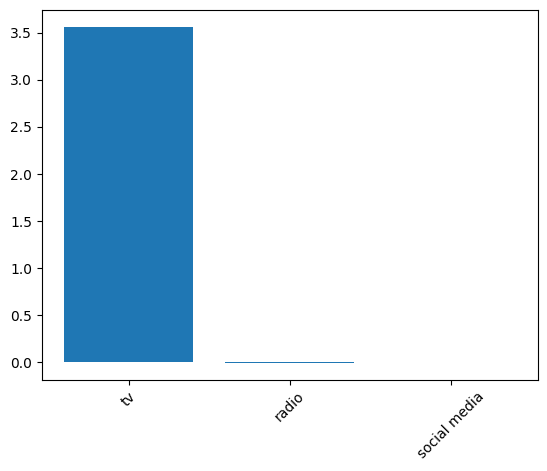

In [166]:
plt.bar(['tv','radio', 'social media'], lasso_coef)
plt.xticks(rotation=45)
plt.show()